Progetto: **Classificazione di testi descrittivi per destinazione d'uso, inerenti ai beni sottoposti ad aste giudiziarie italiane.**

Studente: **Alessandro Monolo** | *10439147*

Relatore: Marco Brambilla

Referente aziendale: Simone Redaelli

Master: Data Science & Artificial Intelligence

Università: Politecnico di Milano

<hr style="border:1px solid black">

## Categorizzazione dei testi tokenizzati utilizzando modelli di classificazione

- **1.** **<u>Stratified K-Fold + BoW + Support Vector Machine model:</u>**
    - **1.1** Utilizzando la text variable pre-processata;
    - **1.2** Utilizzando la text variable pre-processata & Lemmatized;


- **2.** **<u>Stratified K-Fold + BoW + Logisti Regression classifier model:</u>**
    - **2.1** Utilizzando la text variable pre-processata;
    - **2.2** Utilizzando la text variable pre-processata & Lemmatized;
    

- **3.** **<u>Stratified K-Fold + BoW + Naive Bayes Model & GridSearchCV:</u>**
    - **3.1** Attraverso l'utilizzo degli Hyperparameters con GridSearchCV e impiegando la text variable pre-processata;
    - **3.2** Attraverso l'utilizzo degli Hyperparameters con GridSearchCV e impiegando la text variable pre-processata & Lemmatized;
    

- **4.** **<u>Conclusioni.</u>**


<hr style="border:1px solid black">

**Importo le librerie che mi servono:**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from matplotlib import cm
import string
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, precision_score, f1_score, recall_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.exceptions import ConvergenceWarning
from sklearn.naive_bayes import MultinomialNB

#### Set pandas options:

In [2]:
pd.set_option('display.max_colwidth', None)
pd.options.display.max_rows = 5000
pd.options.display.max_columns = 1000
pd.options.display.float_format = '{:.4f}'.format
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn.feature_extraction.text")
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)

**Importo file CSV**

In [3]:
df = pd.read_csv("D:\\Master_Cefriel_DS_AI_Monolo\\0_Project_Work\\Dataset\\11_Dataset_TFIDF_LR_&_SVM\\Dataset_TFIDF_LR_&_SVM.csv")

<hr style="border:1px solid black">

### 1 - Stratified K - Fold + BoW + Support Vector Machine model

**1.1** **Utilizzando la text variable pre-processata:**

In [4]:
bow_converter = CountVectorizer(max_features = 49090, ngram_range=(1,3), analyzer='word') 

X = bow_converter.fit_transform(df['Descrizione_Bene_Pre_Process'])
y = df["Destinazione_Uso_Encoded"]

folds = StratifiedKFold(n_splits=5)

score_precision = []
score_f1 = []
score_recall = []

all_test_indices = []
all_predictions = []

for train_index, test_index in folds.split(X, y):
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    
    clf = LinearSVC()
    clf.fit(X_train, y_train)
    svm_predictions = clf.predict(X_test)
    
    precision = precision_score(y_test, svm_predictions, average='macro', zero_division=0)
    recall = recall_score(y_test, svm_predictions, average='macro', zero_division=0)
    f1 = f1_score(y_test, svm_predictions, average='macro', zero_division=0)    

    score_precision.append(precision)
    score_recall.append(recall)
    score_f1.append(f1)
    
    all_test_indices.extend(test_index)
    all_predictions.extend(svm_predictions)

mean_precision = np.mean(score_precision)
mean_recall = np.mean(score_recall)
mean_f1 = np.mean(score_f1)    

classification_report_str = classification_report(y.iloc[all_test_indices], all_predictions, zero_division=1)

print("Classification Report, averaged over all folds:\n")
print(classification_report_str, "\n")
print("Precision:", round(mean_precision, 2))
print("Recall:", round(mean_recall, 2))
print("F1-Score:", round(mean_f1, 2))

Classification Report, averaged over all folds:

              precision    recall  f1-score   support

           0       0.03      0.03      0.03       550
           1       0.55      0.54      0.54       560
           2       0.37      0.28      0.32      2269
           3       0.72      0.65      0.68      5801
           4       0.90      0.87      0.88    132176
           5       0.58      0.58      0.58      7743
           6       0.32      0.42      0.36     16904

    accuracy                           0.79    166003
   macro avg       0.49      0.48      0.49    166003
weighted avg       0.81      0.79      0.80    166003
 

Precision: 0.5
Recall: 0.48
F1-Score: 0.49


- Utilizzando come **tokenizer** la libreria **BoW** di Sci-kit learn si ottiene poi una **F1 Score** attraverso il modello **SVM** pari all'**0.49**.
- Tale **valore è inferiore** a quello mostrato nell'altro script, dove veniva utilizzato il medesimo modello, con la medesima variabile testuale pre-processata ma non lemmatizzata, tuttavia **usando TFIDF e non BoW**.

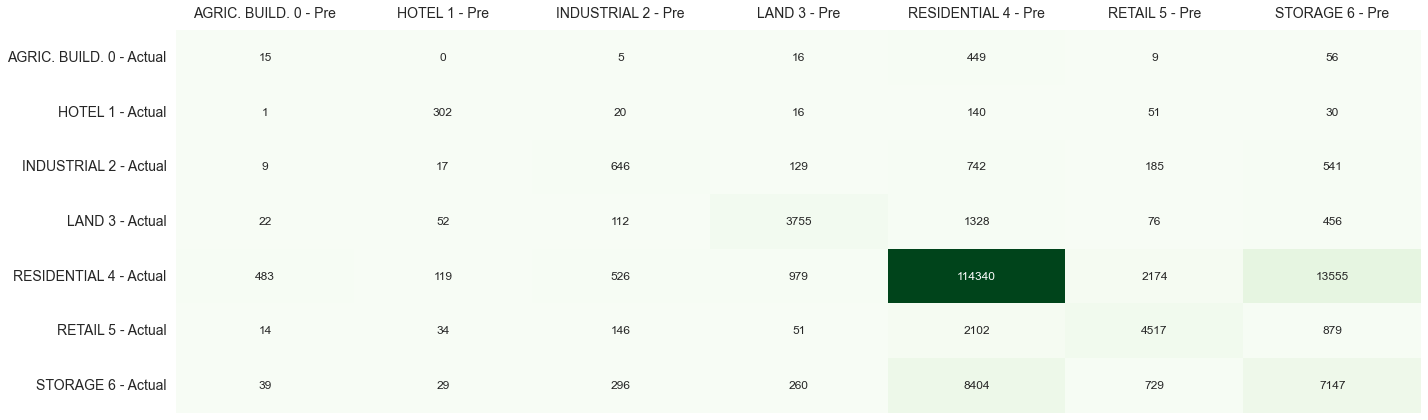

In [5]:
cm_pred = confusion_matrix(y.iloc[all_test_indices], all_predictions)
cm_pred = pd.DataFrame(cm_pred,
                       index=['AGRIC. BUILD. 0 - Actual','HOTEL 1 - Actual','INDUSTRIAL 2 - Actual','LAND 3 - Actual','RESIDENTIAL 4 - Actual','RETAIL 5 - Actual','STORAGE 6 - Actual'],
                       columns = ['AGRIC. BUILD. 0 - Pre','HOTEL 1 - Pre','INDUSTRIAL 2 - Pre','LAND 3 - Pre','RESIDENTIAL 4 - Pre','RETAIL 5 - Pre','STORAGE 6 - Pre'])

# Mostro la confusion matrix su una heatmap:
sns.set(rc={'figure.figsize':(20,6)})
heatmap = sns.heatmap(cm_pred, 
            annot=True, 
            cmap="Greens", 
            fmt="d", 
            xticklabels=['AGRIC. BUILD. 0 - Pre','HOTEL 1 - Pre','INDUSTRIAL 2 - Pre','LAND 3 - Pre','RESIDENTIAL 4 - Pre','RETAIL 5 - Pre','STORAGE 6 - Pre'], 
            yticklabels=['AGRIC. BUILD. 0 - Actual','HOTEL 1 - Actual','INDUSTRIAL 2 - Actual','LAND 3 - Actual','RESIDENTIAL 4 - Actual','RETAIL 5 - Actual','STORAGE 6 - Actual'],
                     cbar=False)

heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=14)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=14)

plt.tick_params(axis='x', labeltop=True, labelbottom=False)
plt.tight_layout()
plt.show()

In [7]:
print("Numero predizioni corrette: ", 15+302+646+3755+114340+4517+7147)
print("Numero predizioni sbagliate: ", 166003-(15+302+646+3755+114340+4517+7147))

Numero predizioni corrette:  130722
Numero predizioni sbagliate:  35281


- Si denota innanzitutto una **diminuzione dei valori corretti** predetti nella classe dei beni 4 (**Residential**);
- Le classi 0 (**Agricultural Building**) e 2 (**Industrial**) sono le **messe peggio**.

**1.2 Utilizzando la text variable pre-processata & Lemmatized**

In [8]:
bow_converter_1 = CountVectorizer(max_features = 50518, ngram_range=(1,3), analyzer='word') 

X_1 = bow_converter_1.fit_transform(df['Descrizione_Bene_Lemm_Spacy'])
y_1 = df["Destinazione_Uso_Encoded"]

folds_1 = StratifiedKFold(n_splits=5)

score_precision_1 = []
score_f1_1 = []
score_recall_1 = []

all_test_indices_1 = []
all_predictions_1 = []

for train_index_1, test_index_1 in folds_1.split(X_1, y_1):
    X_train_1, X_test_1, y_train_1, y_test_1 = X_1[train_index_1], X_1[test_index_1], y_1[train_index_1], y_1[test_index_1]
    
    clf_1 = LinearSVC()
    clf_1.fit(X_train_1, y_train_1)
    svm_predictions_1 = clf_1.predict(X_test_1)
    
    precision_1 = precision_score(y_test_1, svm_predictions_1, average='macro', zero_division=0)
    recall_1 = recall_score(y_test_1, svm_predictions_1, average='macro', zero_division=0)
    f1_1 = f1_score(y_test_1, svm_predictions_1, average='macro', zero_division=0)    

    score_precision_1.append(precision_1)
    score_recall_1.append(recall_1)
    score_f1_1.append(f1_1)
    
    all_test_indices_1.extend(test_index_1)
    all_predictions_1.extend(svm_predictions_1)

mean_precision_1 = np.mean(score_precision_1)
mean_recall_1 = np.mean(score_recall_1)
mean_f1_1 = np.mean(score_f1_1)    

classification_report_str_1 = classification_report(y_1.iloc[all_test_indices_1], all_predictions_1, zero_division=1)

print("Classification Report, averaged over all folds:\n")
print(classification_report_str_1, "\n")
print("Precision:", round(mean_precision_1, 2))
print("Recall:", round(mean_recall_1, 2))
print("F1-Score:", round(mean_f1_1, 2))

Classification Report, averaged over all folds:

              precision    recall  f1-score   support

           0       0.04      0.04      0.04       550
           1       0.52      0.50      0.51       560
           2       0.39      0.28      0.33      2269
           3       0.73      0.65      0.69      5801
           4       0.90      0.87      0.88    132176
           5       0.59      0.58      0.59      7743
           6       0.31      0.42      0.36     16904

    accuracy                           0.79    166003
   macro avg       0.50      0.48      0.48    166003
weighted avg       0.81      0.79      0.80    166003
 

Precision: 0.51
Recall: 0.48
F1-Score: 0.49


- Anche in questo caso l'**F1 Score** registrato è pari a **0.49** come nel modello **precedente**.
- Le predizioni per le classi 0 (**Agricultural Building**) e 2 (**Industrial**) sono **leggermente migliorate**;

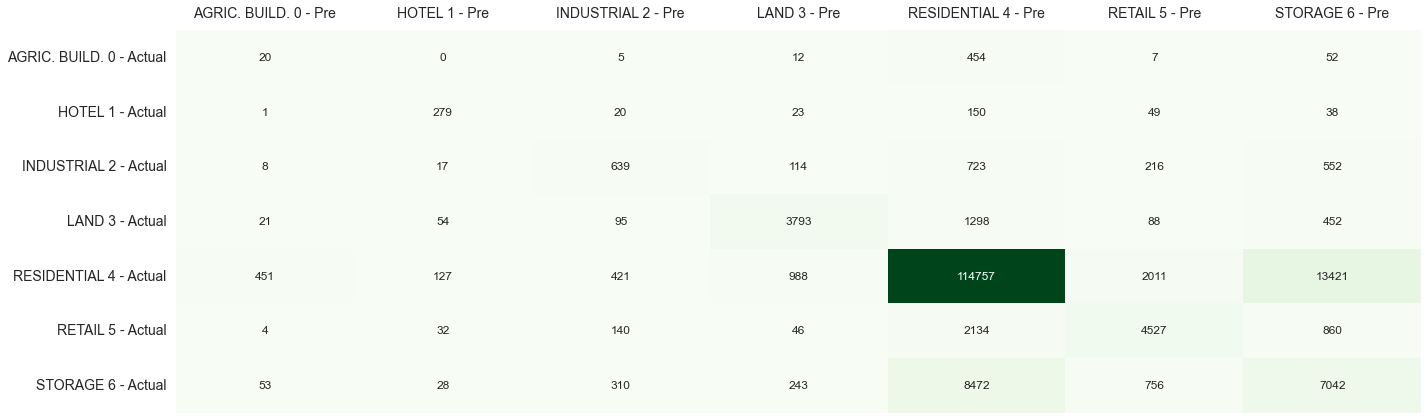

In [9]:
cm_pred_1 = confusion_matrix(y_1.iloc[all_test_indices_1], all_predictions_1)
cm_pred_1 = pd.DataFrame(cm_pred_1,
                       index=['AGRIC. BUILD. 0 - Actual','HOTEL 1 - Actual','INDUSTRIAL 2 - Actual','LAND 3 - Actual','RESIDENTIAL 4 - Actual','RETAIL 5 - Actual','STORAGE 6 - Actual'],
                       columns = ['AGRIC. BUILD. 0 - Pre','HOTEL 1 - Pre','INDUSTRIAL 2 - Pre','LAND 3 - Pre','RESIDENTIAL 4 - Pre','RETAIL 5 - Pre','STORAGE 6 - Pre'])

# Mostro la confusion matrix su una heatmap:
sns.set(rc={'figure.figsize':(20,6)})
heatmap = sns.heatmap(cm_pred_1, 
            annot=True, 
            cmap="Greens", 
            fmt="d", 
            xticklabels=['AGRIC. BUILD. 0 - Pre','HOTEL 1 - Pre','INDUSTRIAL 2 - Pre','LAND 3 - Pre','RESIDENTIAL 4 - Pre','RETAIL 5 - Pre','STORAGE 6 - Pre'], 
            yticklabels=['AGRIC. BUILD. 0 - Actual','HOTEL 1 - Actual','INDUSTRIAL 2 - Actual','LAND 3 - Actual','RESIDENTIAL 4 - Actual','RETAIL 5 - Actual','STORAGE 6 - Actual'],
                     cbar=False)

heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=14)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=14)

plt.tick_params(axis='x', labeltop=True, labelbottom=False)
plt.tight_layout()
plt.show()

In [25]:
print("Numero predizioni corrette: ", 20+279+639+3793+114757+4527+7042)
print("Numero predizioni sbagliate: ", 166003-(20+279+639+3793+114757+4527+7042))

Numero predizioni corrette:  131057
Numero predizioni sbagliate:  34946


- Nonostante l'utilizzo di una variabile testuale lemmatizzata, il **numero complessivo di valori errati rimane alto**, di **poco inferiore** rispetto a quello emerso dall'utilizzo di SVM sulla **variabile testuale non lemmatizzata**.
- Difatti gli errori complessivi emersi prima erano **35.281** mentre ora osno **34.946**.

<hr style="border:1px solid black">

### 2 - Stratified K - Fold + BoW + Logistic Regression model

**2.1** **Utilizzando la text variable pre-processata:**

In [11]:
bow_converter_2 = CountVectorizer(max_features = 49090, ngram_range=(1,3), analyzer='word') 

X_2 = bow_converter_2.fit_transform(df["Descrizione_Bene_Pre_Process"])
y_2 = df["Destinazione_Uso_Encoded"]

folds_2 = StratifiedKFold(n_splits=5)

score_precision_2 = []
score_f1_2 = []
score_recall_2 = []

all_test_indices_2 = []
all_predictions_2 = []

for train_index_2, test_index_2 in folds_2.split(X_2, y_2):
    X_train_2, X_test_2, y_train_2, y_test_2 = X_2[train_index_2], X_2[test_index_2], y_2[train_index_2], y_2[test_index_2]

    logistic_model_2 = LogisticRegression(multi_class='ovr', C=0.1, max_iter=1000)
    logistic_model_2.fit(X_train_2, y_train_2)
    lr_predictions_2 = logistic_model_2.predict(X_test_2)
    
    precision_2 = precision_score(y_test_2, lr_predictions_2, average='macro', zero_division=0)
    recall_2 = recall_score(y_test_2, lr_predictions_2, average='macro', zero_division=0)
    f1_2 = f1_score(y_test_2, lr_predictions_2, average='macro', zero_division=0)    

    score_precision_2.append(precision_2)
    score_recall_2.append(recall_2)
    score_f1_2.append(f1_2)
    
    all_test_indices_2.extend(test_index_2)
    all_predictions_2.extend(lr_predictions_2)

mean_precision_2 = np.mean(score_precision_2)
mean_recall_2 = np.mean(score_recall_2)
mean_f1_2 = np.mean(score_f1_2)    

classification_report_str_2 = classification_report(y_2.iloc[all_test_indices_2], all_predictions_2, zero_division=0)

print("Classification Report, averaged over all folds:\n")
print(classification_report_str_2, "\n")
print("Precision:", round(mean_precision_2, 2))
print("Recall:", round(mean_recall_2, 2))
print("F1-Score:", round(mean_f1_2, 2))

Classification Report, averaged over all folds:

              precision    recall  f1-score   support

           0       0.18      0.01      0.02       550
           1       0.75      0.42      0.54       560
           2       0.61      0.31      0.41      2269
           3       0.80      0.68      0.74      5801
           4       0.90      0.95      0.92    132176
           5       0.75      0.66      0.70      7743
           6       0.53      0.40      0.46     16904

    accuracy                           0.86    166003
   macro avg       0.65      0.49      0.54    166003
weighted avg       0.84      0.86      0.85    166003
 

Precision: 0.66
Recall: 0.49
F1-Score: 0.54


- Rispetto al modello utilizzato precedentemente (SVM), in questo caso con **Logistic Regression model**, l'**F1 Score** è aumentata di **5 punti percentuali**, raggiungendo **0.54**.
- Rimane **molto bassa** l'**F1 Score** relativa alla classe 0 (**Agricultural Building**), tuttavia le classi 4 (**Residential**), 5 (**Retail**) e 6 (**Storage**), sono **notevolmente migliorate**.

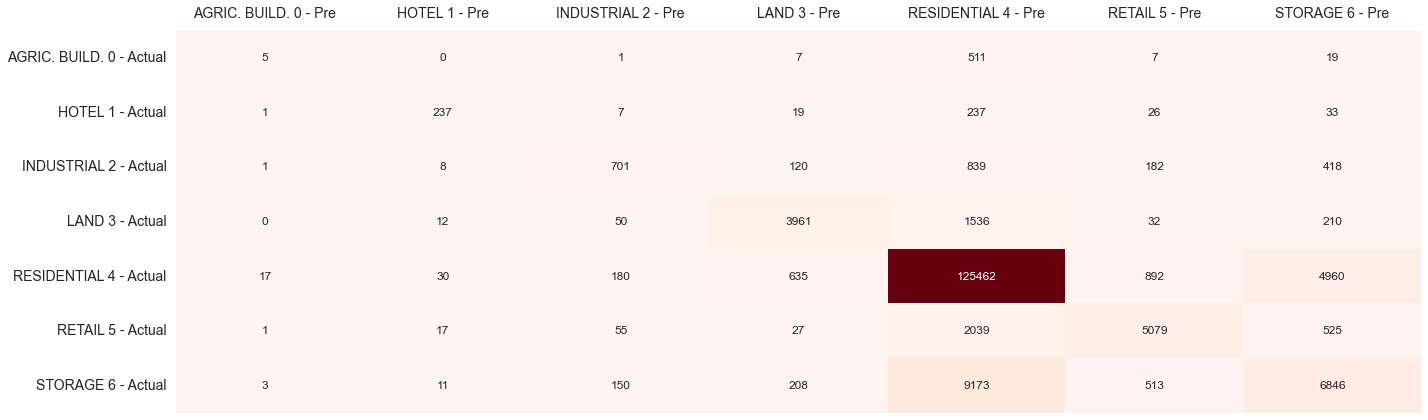

In [12]:
cm_pred_2 = confusion_matrix(y_2.iloc[all_test_indices_2], all_predictions_2)
cm_pred_2 = pd.DataFrame(cm_pred_2,
                       index=['AGRIC. BUILD. 0 - Actual','HOTEL 1 - Actual','INDUSTRIAL 2 - Actual','LAND 3 - Actual','RESIDENTIAL 4 - Actual','RETAIL 5 - Actual','STORAGE 6 - Actual'],
                       columns = ['AGRIC. BUILD. 0 - Pre','HOTEL 1 - Pre','INDUSTRIAL 2 - Pre','LAND 3 - Pre','RESIDENTIAL 4 - Pre','RETAIL 5 - Pre','STORAGE 6 - Pre'])

# Mostro la confusion matrix su una heatmap:
sns.set(rc={'figure.figsize':(20,6)})
heatmap = sns.heatmap(cm_pred_2, 
            annot=True, 
            cmap="Reds", 
            fmt="d", 
            xticklabels=['AGRIC. BUILD. 0 - Pre','HOTEL 1 - Pre','INDUSTRIAL 2 - Pre','LAND 3 - Pre','RESIDENTIAL 4 - Pre','RETAIL 5 - Pre','STORAGE 6 - Pre'], 
            yticklabels=['AGRIC. BUILD. 0 - Actual','HOTEL 1 - Actual','INDUSTRIAL 2 - Actual','LAND 3 - Actual','RESIDENTIAL 4 - Actual','RETAIL 5 - Actual','STORAGE 6 - Actual'],
                     cbar=False)

heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=14)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=14)

plt.tick_params(axis='x', labeltop=True, labelbottom=False)
plt.tight_layout()
plt.show()

In [26]:
print("Numero predizioni corrette: ", 5+237+701+3961+125462+5079+6846)
print("Numero predizioni sbagliate: ", 166003-(5+237+701+3961+125462+5079+6846))

Numero predizioni corrette:  142291
Numero predizioni sbagliate:  23712


- Anche il **numero di predizioni errate** è complessivamente **diminuito**, di circa **10.000 errori in meno**, rispetto a quelli emersi con SVM.
- Come detto, le predizioni corrette per la classe 0 (**Agricultural Building**) sono ancora **insufficienti**, tuttavia per le classi 3 (**Land**) e 5 (**Retail**), la situazione è **migliorata**.

**2.2 Utilizzando la text variable pre-processata & Lemmatized**

In [14]:
bow_converter_3 = CountVectorizer(max_features = 50518, ngram_range=(1,3), analyzer='word') 

X_3 = bow_converter_3.fit_transform(df["Descrizione_Bene_Lemm_Spacy"])
y_3 = df["Destinazione_Uso_Encoded"]

folds_3 = StratifiedKFold(n_splits=5)

score_precision_3 = []
score_f1_3 = []
score_recall_3 = []

all_test_indices_3 = []
all_predictions_3 = []

for train_index_3, test_index_3 in folds_3.split(X_3, y_3):
    X_train_3, X_test_3, y_train_3, y_test_3 = X_3[train_index_3], X_3[test_index_3], y_3[train_index_3], y_3[test_index_3]

    logistic_model_3 = LogisticRegression(multi_class='ovr', C=0.1, max_iter=1000)
    logistic_model_3.fit(X_train_3, y_train_3)
    lr_predictions_3 = logistic_model_3.predict(X_test_3)
    
    precision_3 = precision_score(y_test_3, lr_predictions_3, average='macro', zero_division=0)
    recall_3 = recall_score(y_test_3, lr_predictions_3, average='macro', zero_division=0)
    f1_3 = f1_score(y_test_3, lr_predictions_3, average='macro', zero_division=0)    

    score_precision_3.append(precision_3)
    score_recall_3.append(recall_3)
    score_f1_3.append(f1_3)
    
    all_test_indices_3.extend(test_index_3)
    all_predictions_3.extend(lr_predictions_3)

mean_precision_3 = np.mean(score_precision_3)
mean_recall_3 = np.mean(score_recall_3)
mean_f1_3 = np.mean(score_f1_3)    

classification_report_str_3 = classification_report(y_3.iloc[all_test_indices_3], all_predictions_3, zero_division=0)

print("Classification Report, averaged over all folds:\n")
print(classification_report_str_3, "\n")
print("Precision:", round(mean_precision_3, 2))
print("Recall:", round(mean_recall_3, 2))
print("F1-Score:", round(mean_f1_3, 2))

Classification Report, averaged over all folds:

              precision    recall  f1-score   support

           0       0.12      0.01      0.01       550
           1       0.72      0.42      0.53       560
           2       0.61      0.31      0.41      2269
           3       0.80      0.67      0.73      5801
           4       0.90      0.95      0.92    132176
           5       0.75      0.65      0.70      7743
           6       0.53      0.41      0.46     16904

    accuracy                           0.86    166003
   macro avg       0.63      0.49      0.54    166003
weighted avg       0.84      0.86      0.85    166003
 

Precision: 0.65
Recall: 0.49
F1-Score: 0.54


- In questo caso, utilizzando la variabile testuale pre-processata e lemmatizzata, **la situazione non cambia minimamente**. Anzi, la classe 0 (**Agricultural Building**) risulta **perdere F1 Score**, mentre le **restanti classi** sono **identiche** per metriche di valutazione.

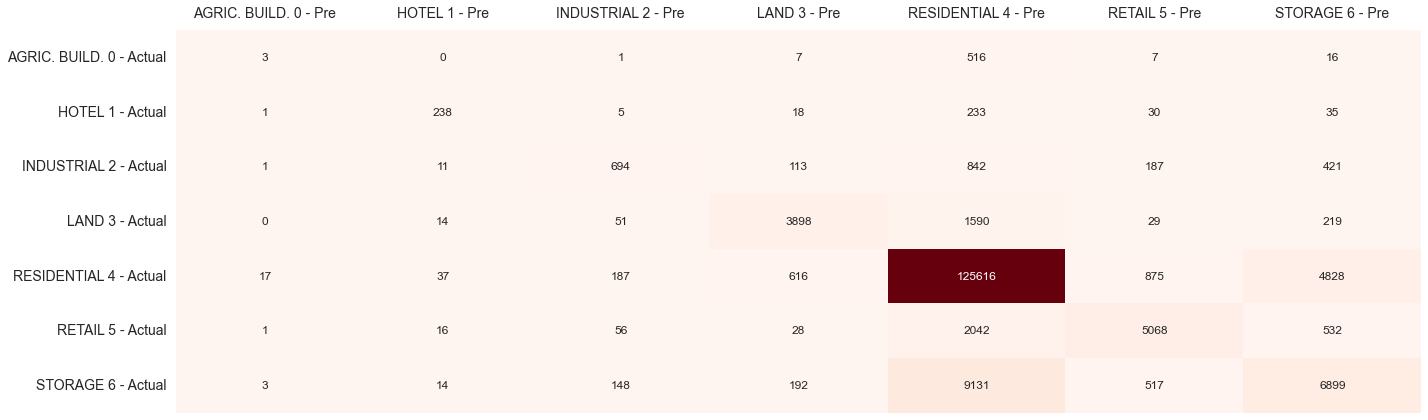

In [15]:
cm_pred_3 = confusion_matrix(y_3.iloc[all_test_indices_3], all_predictions_3)
cm_pred_3 = pd.DataFrame(cm_pred_3,
                       index=['AGRIC. BUILD. 0 - Actual','HOTEL 1 - Actual','INDUSTRIAL 2 - Actual','LAND 3 - Actual','RESIDENTIAL 4 - Actual','RETAIL 5 - Actual','STORAGE 6 - Actual'],
                       columns = ['AGRIC. BUILD. 0 - Pre','HOTEL 1 - Pre','INDUSTRIAL 2 - Pre','LAND 3 - Pre','RESIDENTIAL 4 - Pre','RETAIL 5 - Pre','STORAGE 6 - Pre'])

# Mostro la confusion matrix su una heatmap:
sns.set(rc={'figure.figsize':(20,6)})
heatmap = sns.heatmap(cm_pred_3, 
            annot=True, 
            cmap="Reds", 
            fmt="d", 
            xticklabels=['AGRIC. BUILD. 0 - Pre','HOTEL 1 - Pre','INDUSTRIAL 2 - Pre','LAND 3 - Pre','RESIDENTIAL 4 - Pre','RETAIL 5 - Pre','STORAGE 6 - Pre'], 
            yticklabels=['AGRIC. BUILD. 0 - Actual','HOTEL 1 - Actual','INDUSTRIAL 2 - Actual','LAND 3 - Actual','RESIDENTIAL 4 - Actual','RETAIL 5 - Actual','STORAGE 6 - Actual'],
                     cbar=False)

heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=14)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=14)

plt.tick_params(axis='x', labeltop=True, labelbottom=False)
plt.tight_layout()
plt.show()

In [27]:
print("Numero predizioni corrette: ", 3+238+694+3898+125616+5068+6899)
print("Numero predizioni sbagliate: ", 166003-(3+238+694+3898+125616+5068+6899))

Numero predizioni corrette:  142416
Numero predizioni sbagliate:  23587


- Come detto, le quantità di **predizioni corrette** sono rimaste praticamente **invariate**, addirittura la classe 0 (Agricultural Building) è diminuita.
- leggermente diminuiti il numero di errori complessivi, passando da **23.712** a **23.587**.

<hr style="border:1px solid black">

### 3 - Stratified K-Fold + BoW + Naive Bayes Model & GridSearchCV

**3.1** **Trovo gli hyperparametri e utilizzo la text variable pre-processata:**

In [17]:
bow_converter_4 = CountVectorizer(max_features = 49090, ngram_range=(1,3), analyzer='word') 
X_4 = bow_converter_4.fit_transform(df["Descrizione_Bene_Pre_Process"])
y_4 = df["Destinazione_Uso_Encoded"]
folds_4 = StratifiedKFold(n_splits=5)

param_grid = {'alpha': [0.0, 0.01, 0.1, 0.5, 1.0], 'fit_prior': [True, False], 'force_alpha': [True, False]}
grid_search = GridSearchCV(MultinomialNB(), param_grid, cv=folds_4, scoring='f1', n_jobs=-1)
grid_search.fit(X_4, y_4)
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'alpha': 0.0, 'fit_prior': True, 'force_alpha': True}


- **Applico gli hyperparameters trovati**

In [18]:
score_precision_4 = []
score_f1_4 = []
score_recall_4 = []

all_test_indices_4 = []
all_predictions_4 = []

for train_index_4, test_index_4 in folds_4.split(X_4, y_4):
    X_train_4, X_test_4, y_train_4, y_test_4 = X_4[train_index_4], X_4[test_index_4], y_4[train_index_4], y_4[test_index_4]

    nbc_model_4 = MultinomialNB(alpha = 0.0, fit_prior = True, force_alpha = True)
    nbc_model_4.fit(X_train_4, y_train_4)
    nbc_predictions_4 = nbc_model_4.predict(X_test_4)

    precision_4 = precision_score(y_test_4, nbc_predictions_4, average='macro', zero_division=0)
    recall_4 = recall_score(y_test_4, nbc_predictions_4, average='macro', zero_division=0)
    f1_4 = f1_score(y_test_4, nbc_predictions_4, average='macro', zero_division=0)

    score_precision_4.append(precision_4)
    score_recall_4.append(recall_4)
    score_f1_4.append(f1_4)

    all_test_indices_4.extend(test_index_4)
    all_predictions_4.extend(nbc_predictions_4)

mean_precision_4 = np.mean(score_precision_4)
mean_recall_4 = np.mean(score_recall_4)
mean_f1_4 = np.mean(score_f1_4)

classification_report_str_4 = classification_report(y_4.iloc[all_test_indices_4], all_predictions_4, zero_division=0)

print("Classification Report, averaged over all folds:\n")
print(classification_report_str_4, "\n")
print("Precision:", round(mean_precision_4, 2))
print("Recall:", round(mean_recall_4, 2))
print("F1-Score:", round(mean_f1_4, 2))

Classification Report, averaged over all folds:

              precision    recall  f1-score   support

           0       0.00      0.08      0.00       550
           1       0.22      0.09      0.12       560
           2       0.14      0.10      0.12      2269
           3       0.71      0.31      0.43      5801
           4       0.87      0.71      0.78    132176
           5       0.46      0.34      0.39      7743
           6       0.30      0.27      0.29     16904

    accuracy                           0.62    166003
   macro avg       0.39      0.27      0.31    166003
weighted avg       0.77      0.62      0.69    166003
 

Precision: 0.39
Recall: 0.27
F1-Score: 0.3


- Con l'utilizzo del modello Naive Bayes, insieme agli hyperparameters, l'**F1 Score generale** raggiunge il valore più basso registrato con l'utilizzo del tokenizer **BoW**, pari a **0.3**.
- La classe 0 (**Agricultural Building**), è **rimasta uguale** risultando ancora pari a 0.
- In generale, **tutte le altre classi registrano un F1 Score più basso** rispetto ad ogni altra combinazione provata precedentemente.

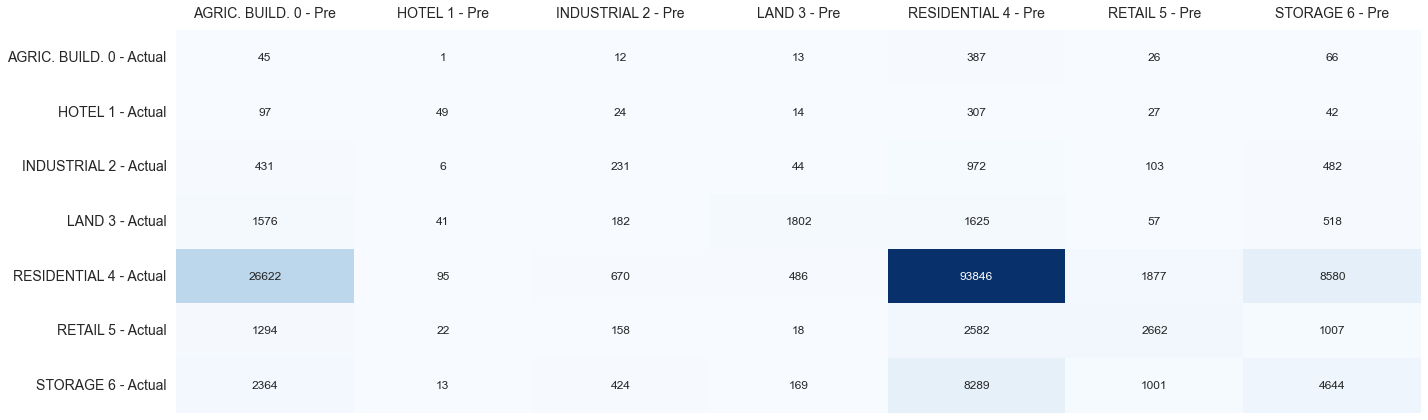

In [19]:
cm_pred_4 = confusion_matrix(y_4.iloc[all_test_indices_4], all_predictions_4)
cm_pred_4 = pd.DataFrame(cm_pred_4,
                       index=['AGRIC. BUILD. 0 - Actual','HOTEL 1 - Actual','INDUSTRIAL 2 - Actual','LAND 3 - Actual','RESIDENTIAL 4 - Actual','RETAIL 5 - Actual','STORAGE 6 - Actual'],
                       columns = ['AGRIC. BUILD. 0 - Pre','HOTEL 1 - Pre','INDUSTRIAL 2 - Pre','LAND 3 - Pre','RESIDENTIAL 4 - Pre','RETAIL 5 - Pre','STORAGE 6 - Pre'])

# Mostro la confusion matrix su una heatmap:
sns.set(rc={'figure.figsize':(20,6)})
heatmap = sns.heatmap(cm_pred_4, 
            annot=True, 
            cmap="Blues", 
            fmt="d", 
            xticklabels=['AGRIC. BUILD. 0 - Pre','HOTEL 1 - Pre','INDUSTRIAL 2 - Pre','LAND 3 - Pre','RESIDENTIAL 4 - Pre','RETAIL 5 - Pre','STORAGE 6 - Pre'], 
            yticklabels=['AGRIC. BUILD. 0 - Actual','HOTEL 1 - Actual','INDUSTRIAL 2 - Actual','LAND 3 - Actual','RESIDENTIAL 4 - Actual','RETAIL 5 - Actual','STORAGE 6 - Actual'],
                     cbar=False)

heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=14)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=14)

plt.tick_params(axis='x', labeltop=True, labelbottom=False)
plt.tight_layout()
plt.show()

In [28]:
print("Numero predizioni corrette: ", 45+49+231+1802+93846+2662+4644)
print("Numero predizioni sbagliate: ", 166003-(45+49+231+1802+93846+2662+4644))

Numero predizioni corrette:  103279
Numero predizioni sbagliate:  62724


- Il **numero complessivo di errori è decisamente aumentato**, registrando un aumento di valori predetti incorrettamente nella classe 4 (**Residential**).
- Le altre classi, in particolar modo, le classi 0 (**Agricultural Building**), 1 (**Hotel**) e 2 (**Industrial**), sono **notevolmente aumentate in valori predetti negativamente**.
- In totale gli errori sono il doppio/triplo rispetto ai modelli visti prima, essendo ora **62.724**.

**3.2** **Trovo gli hyperparametri e utilizzo la text variable pre-processata & Lemmatizzata:**

In [21]:
bow_converter_5 = CountVectorizer(max_features = 50518, ngram_range=(1,3), analyzer='word') 
X_5 = bow_converter_5.fit_transform(df["Descrizione_Bene_Lemm_Spacy"])
y_5 = df["Destinazione_Uso_Encoded"]
folds_5 = StratifiedKFold(n_splits=5)

param_grid_1 = {'alpha': [0.0, 0.01, 0.1, 0.5, 1.0], 'fit_prior': [True, False], 'force_alpha': [True, False]}
grid_search_1 = GridSearchCV(MultinomialNB(), param_grid_1, cv=folds_5, scoring='f1', n_jobs=-1)
grid_search_1.fit(X_5, y_5)
best_params_1 = grid_search_1.best_params_
best_estimator_1 = grid_search_1.best_estimator_

print("Best Hyperparameters:", best_params_1)

Best Hyperparameters: {'alpha': 0.0, 'fit_prior': True, 'force_alpha': True}


- **Applico gli hyperparameters:**

In [22]:
score_precision_5 = []
score_f1_5 = []
score_recall_5 = []

all_test_indices_5 = []
all_predictions_5 = []

for train_index_5, test_index_5 in folds_5.split(X_5, y_5):
    X_train_5, X_test_5, y_train_5, y_test_5 = X_5[train_index_5], X_5[test_index_5], y_5[train_index_5], y_5[test_index_5]

    nbc_model_5 = MultinomialNB(alpha = 0.0, fit_prior = True, force_alpha = True)
    nbc_model_5.fit(X_train_5, y_train_5)
    nbc_predictions_5 = nbc_model_5.predict(X_test_5)

    precision_5 = precision_score(y_test_5, nbc_predictions_5, average='macro', zero_division=0)
    recall_5 = recall_score(y_test_5, nbc_predictions_5, average='macro', zero_division=0)
    f1_5 = f1_score(y_test_5, nbc_predictions_5, average='macro', zero_division=0)

    score_precision_5.append(precision_5)
    score_recall_5.append(recall_5)
    score_f1_5.append(f1_5)

    all_test_indices_5.extend(test_index_5)
    all_predictions_5.extend(nbc_predictions_5)

mean_precision_5 = np.mean(score_precision_5)
mean_recall_5 = np.mean(score_recall_5)
mean_f1_5 = np.mean(score_f1_5)

classification_report_str_5 = classification_report(y_5.iloc[all_test_indices_5], all_predictions_5, zero_division=0)

print("Classification Report, averaged over all folds:\n")
print(classification_report_str_5, "\n")
print("Precision:", round(mean_precision_5, 2))
print("Recall:", round(mean_recall_5, 2))
print("F1-Score:", round(mean_f1_5, 2))

Classification Report, averaged over all folds:

              precision    recall  f1-score   support

           0       0.00      0.08      0.00       550
           1       0.18      0.07      0.10       560
           2       0.13      0.10      0.11      2269
           3       0.70      0.30      0.42      5801
           4       0.87      0.72      0.79    132176
           5       0.48      0.34      0.40      7743
           6       0.31      0.27      0.29     16904

    accuracy                           0.63    166003
   macro avg       0.38      0.27      0.30    166003
weighted avg       0.77      0.63      0.69    166003
 

Precision: 0.38
Recall: 0.27
F1-Score: 0.3


- Utilizzando la **variabile testuale lemmatizzata e pre-processata**, non si vede una miglioria della F1 Score essendo ancora pari a **0.30**.
- Tuttavia le **classi in generale non mostrano evidenti migliorie** inerenti alle metriche di valutazione.

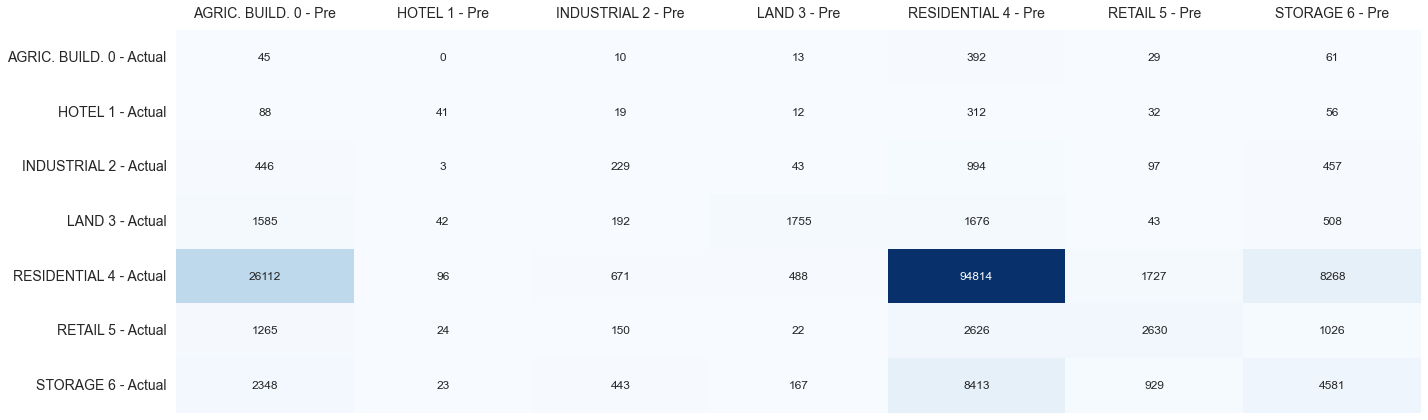

In [23]:
cm_pred_5 = confusion_matrix(y_5.iloc[all_test_indices_5], all_predictions_5)
cm_pred_5 = pd.DataFrame(cm_pred_5,
                       index=['AGRIC. BUILD. 0 - Actual','HOTEL 1 - Actual','INDUSTRIAL 2 - Actual','LAND 3 - Actual','RESIDENTIAL 4 - Actual','RETAIL 5 - Actual','STORAGE 6 - Actual'],
                       columns = ['AGRIC. BUILD. 0 - Pre','HOTEL 1 - Pre','INDUSTRIAL 2 - Pre','LAND 3 - Pre','RESIDENTIAL 4 - Pre','RETAIL 5 - Pre','STORAGE 6 - Pre'])

# Mostro la confusion matrix su una heatmap:
sns.set(rc={'figure.figsize':(20,6)})
heatmap = sns.heatmap(cm_pred_5, 
            annot=True, 
            cmap="Blues", 
            fmt="d", 
            xticklabels=['AGRIC. BUILD. 0 - Pre','HOTEL 1 - Pre','INDUSTRIAL 2 - Pre','LAND 3 - Pre','RESIDENTIAL 4 - Pre','RETAIL 5 - Pre','STORAGE 6 - Pre'], 
            yticklabels=['AGRIC. BUILD. 0 - Actual','HOTEL 1 - Actual','INDUSTRIAL 2 - Actual','LAND 3 - Actual','RESIDENTIAL 4 - Actual','RETAIL 5 - Actual','STORAGE 6 - Actual'],
                     cbar=False)

heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=14)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=14)

plt.tick_params(axis='x', labeltop=True, labelbottom=False)
plt.tight_layout()
plt.show()

In [29]:
print("Numero predizioni corrette: ", 45+41+229+1755+94814+2630+4581)
print("Numero predizioni sbagliate: ", 166003-(45+41+229+1755+94814+2630+4581))

Numero predizioni corrette:  104095
Numero predizioni sbagliate:  61908


- Il **numero di errori in generale**, **diminuisce di poco** rispetto all'utilizzo da parte del modello Naive Bayes della variabile non lemmatizzata.

<hr style="border:1px solid black">

### 4 - Conclusioni

- **1.1 - Stratified K - Fold + BoW + Support Vector Machine model con testo pre-processato:**
    - F1-Score: **0.49**
    -  Numero predizioni corrette:  **130.722**
    -  Numero predizioni sbagliate:  **35.281**


- **1.2 - Stratified K - Fold + BoW + Support Vector Machine model con testo pre-processato & Lemmatizzato:**
    - F1-Score: **0.49**
    -  Numero predizioni corrette:  **131.057**
    -  Numero predizioni sbagliate:  **34.946**


- **2.1 - Stratified K - Fold + BoW + Logistic Regression con testo pre-processato:**
    - F1-Score: **0.54**
    - Numero predizioni corrette:  **142.291**
    - Numero predizioni sbagliate:  **23.712**


- **2.2 - <u>Stratified K - Fold + BoW + Logistic Regression con testo pre-processato & Lemmatizzato:</u>**
     - <u>F1-Score: **0.54**</u>
     - Accuracy: **0.86**
     - Numero predizioni corrette:  **142.416**
     - Numero predizioni sbagliate:  **23.587**


- **3.1 - Stratified K - Fold + BoW + Naive Bayes Model & GridSearchCV con testo pre-processato:**
    - Best Hyperparameters: {'alpha': 0.0, 'fit_prior': True, 'force_alpha': True}
    -  F1-Score: **0.30**
    -  Numero predizioni corrette:  **103.279**
    -  Numero predizioni sbagliate:  **62.724**


- **3.2 - Stratified K - Fold + BoW + Naive Bayes Model & GridSearchCV con testo pre-processato & Lemmatizzato:**
    - Best Hyperparameters: {'alpha': 0.0, 'fit_prior': True, 'force_alpha': True}
    - F1-Score: **0.30**
    - Numero predizioni corrette:  **104.095**
    - Numero predizioni sbagliate:  **61.908**
      
<hr style="border:1px solid black">


#### In conclusione

- L'utilizzo di una **variabile testuale Pre-Processata e Lemmatizatta**, restituisce metriche di valutazione identiche rispetto a quelle relative all'utilizzo di una variabile testuale solo Pre-Processata; 
- L'**F1 score più alta** viene raggiunta dal modello **Logistic Regression con testo pre-processato & Lemmatizzato**, pari a **0.54**;
- Il **numero minore di errori complessivi** è ottenuto di nuovo con il modello **Logistic Regression** ed è pari a **23.587**.


- Il **tokenizer BoW** è stato impiegato utilizzando i seguenti parametri:
    - **max_features= 50518**, ovvero il numero di stringhe univoche presenti all'interno della variabile testuale pulita, pre-processata e lemmatizzata.;
    - **ngram_range= (1, 3)**, ovvero che per l'analisi della frequenza il modello tiene conto sia degli n-grams, che dei bigrams, così come dei trigrams, che abbiamo visto essere importanti durante la EDA della variabile testuale;
    - **analyzer= 'word'**, ovvero che per la tokenizzazione tiene conto delle parole e non dei caratteri;


- In **conclusione** quindi il modello che performa meglio è il seguente:
    - **<u>2.2 - Stratified K - Fold + BoW + Logistic Regression con testo pre-processato & Lemmatizzato.</u>**